In [1]:
# Dependencies
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [2]:
# Name of the CSV file
file = '../Resources/FINAL_CLEAN_FILE.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
data

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,CUR_ILL,HISTORY,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,33.0,26-35,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,64.0,56-65,1.0,0.0,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,37.0,36-45,1.0,1.0,1.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1094159,Peripheral paralysis,Arterial,SEVERE,1.0,67.0,66-75,1.0,0.0,1.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1094332,Arthrogram,Joint Pain/Discomfort,MILD,1.0,82.0,76-85,1.0,1.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1095188,Brachial artery entrapment syndrome,Arterial,SEVERE,0.0,77.0,76-85,1.0,1.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,1100479,Visual acuity reduced,Alterred Vision,MODERATE,0.0,85.0,76-85,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [5]:
data.groupby(['SEVERITY_LEVEL']).count()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
SEVERITY_LEVEL,,,,,,,,,,,,,,,,,,,,,
MILD,23836,23836,23836,23836,23836,23836,23836,23836,23836,23836,...,23836,23836,23836,23836,23836,23836,23836,23836,23836,23836
MODERATE,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,...,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984
SEVERE,662,662,662,662,662,662,662,662,662,662,...,662,662,662,662,662,662,662,662,662,662


In [6]:
X = data.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [7]:
y = LabelEncoder().fit_transform(data['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 2, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9054428276521826
Testing Score: 0.8938226853949555


In [11]:
features = clf.feature_importances_

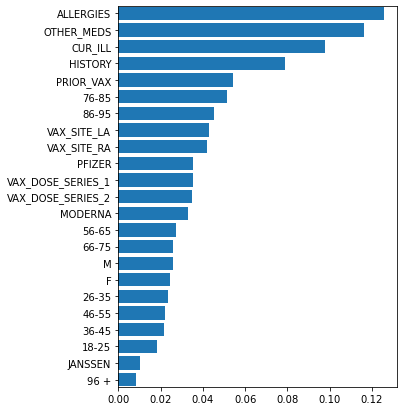

In [12]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,7)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [13]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[5902,   65,    5],
       [ 475,   10,    1],
       [ 159,    4,    0]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5972
           1       0.13      0.02      0.04       486
           2       0.00      0.00      0.00       163

    accuracy                           0.89      6621
   macro avg       0.34      0.34      0.33      6621
weighted avg       0.82      0.89      0.85      6621



In [15]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9054428276521826
Testing Score: 0.892916477873433


# Bagging

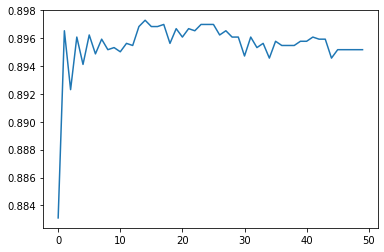

score: 0.8951819966772391


In [16]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9054428276521826
Testing Score: 0.892916477873433


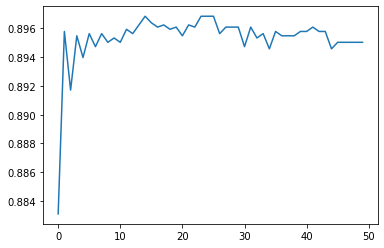

score: 0.8950309620903187


In [18]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [19]:
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9054428276521826
Testing Score: 0.8942757891557167


In [20]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

90.19785530886573


# Model Selection

In [24]:
reg_full = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X, y)
predictions = reg_full.predict(X)

print(reg_full.score(X,y))
print(predictions)

0.9041235556226871
[0 0 0 ... 0 0 0]


In [22]:
import pickle

In [26]:
# save the model
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Prepare the testing data

In [27]:
reg_load = pickle.load(open(filename, 'rb'))

In [28]:
X.columns

Index(['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M',
       'JANSSEN', 'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1',
       'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35',
       '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +'],
      dtype='object')

In [29]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [30]:
features_np = ['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M',
       'JANSSEN', 'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1',
       'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35',
       '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +']
user_input = np.zeros(len(features_np))
user_input2 = np.zeros(len(features_np))

In [ ]:
age_group = '36-45'
gender = 'F'
other_meds = 'N'
cur_ill = 'N'
history = 'N'
prior_vax = 'N'
allergies = 'N'
vaccine = 'Moderna'
dose = 2